# Probability of Default Modeling
* Identify the credit risk modeling for loan data set from kaggle 
* In this Notebook we explore the dataset
* Data preperation
* Identify the high contribution features using WOE and IV
* This is the 1st Notebook for PD_LGD_EAD Credit modeling

In [1]:
# Download Dataset and Package

In [1]:
import numpy as np
import pandas as pd

# Credit Risk Modeling in Python 2022
# 365 Careers


import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
load_data_backup = pd.read_csv("loan_data_2007_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
load_data_backup

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [8]:
loan_data = load_data_backup.copy()

In [9]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [14]:
loan_data.iloc[:,1:].columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [13]:
loan_data.iloc[:,1:].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

In [6]:
pd.options.display.max_columns = 100

In [7]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [9]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [11]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [15]:
loan_data.info()
# term , emp_length are object but we expect them to be numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [13]:
loan_data['emp_length'].unique() # to turn them into int, we get rid of years, +, nan, <1 year  

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

In [15]:
type(loan_data['emp_length_int'][0])

str

In [16]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [17]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [18]:
loan_data['term'].unique() 

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
loan_data['term_int'] =loan_data['term'].str.replace(' ','')
loan_data['term_int'] =loan_data['term_int'].str.replace('months','')
loan_data['term_int'] =pd.to_numeric(loan_data['term_int'])


In [20]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [21]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.c

In [22]:
loan_data['earliest_cr_line'] # we can calculate the time between each event

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [23]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y') # %b -> look at 1st 3 etter of month, and %y last 2 of year

In [24]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
# time since earliest creditline issue

pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']


0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [26]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric(
    (pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))
                                                 )



In [27]:
loan_data['mths_since_earliest_cr_line'].describe() # minmim value = negative -> time difference wrield

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] <0]



,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [29]:
# from above earliest creditline are way into the future, bc of convertion issue from str to datetime
# since these value are way to far inthe past -> we can impute with the largest value of time different

In [30]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [32]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') -loan_data['issue_d_date'])/np.timedelta64(1, 'M'))  )
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [33]:
# preprocessing few discrete variable
#focus on discrete/ categorical variable 
# grade , sub_grade , home_ownership , verification_status, loan_status, purpose , addr_state , initial_list_status

In [34]:
loan_data['grade'].unique()


array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [35]:
pd.get_dummies(loan_data['grade'], prefix = 'grade' , prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [36]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'],prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'],prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'],prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'],prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'],prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'],prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ':')]
                     
                     
                     
                     

In [37]:
loan_data_dummies = pd.concat(loan_data_dummies, axis= 1)

In [38]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies],axis=1)

In [40]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [41]:
# check missing value and clean

loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,...,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [42]:
pd.options.display.max_rows = 300
loan_data.isnull().sum() 

## there are some missing value 


# varibles we will need for analysis
# annual_inc
# delinq_2yrs
# inq_last_6mths
# open_acc
# pub_rec
# total_acc
# acc_now_delinq
# total_rev_hi_lim
# emp_length_int
# mths_since_earliest_cr_line

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [43]:
pd.options.display.max_rows = 100
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [44]:
# total revolving limit
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [45]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [46]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)




In [47]:
loan_data['delinq_2yrs'].isnull().sum()

0

In [48]:
# section 5 PD Model: Data Preparation


# EL (expected loss) = PD * LGD * EAD 

# default definition : (common defn) borrower has default if they are more than 90 days past due on a loan.
# borrower = default if they commit fraud


In [49]:
# PD MODEL

In [50]:
loan_data['loan_status'].unique()

# default -> Charged Off , 

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [51]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [52]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [53]:
# good 1 , bad 0
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)'
                                                               ]) , 0, 1 )





In [54]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [55]:
# weight of evidence: to what extend an independent variable would predict a dependent variable
 

In [56]:
# spliting Data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad',axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 789)

In [59]:
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(373028, 207)
(93257, 207)
(373028,)
(93257,)


In [60]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

# re run here again

In [61]:
# Data preperation : An example

In [62]:
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [63]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
55355,C,1
201266,A,1
83175,C,1
188356,A,1
244824,A,1


In [64]:
df1.groupby(["grade"], as_index = False)["good_bad"].count()

,grade,good_bad
0,A,59933
1,B,109441
2,C,100210
3,D,61491
4,E,28574
5,F,10711
6,G,2668


In [65]:
df1.groupby(["grade"], as_index = False)["good_bad"].mean()

,grade,good_bad
0,A,0.961507
1,B,0.921711
2,C,0.885241
3,D,0.845603
4,E,0.804578
5,F,0.763888
6,G,0.725262


In [66]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [67]:
df1

,grade,good_bad,grade,good_bad
0,A,59933,A,0.961507
1,B,109441,B,0.921711
2,C,100210,C,0.885241
3,D,61491,D,0.845603
4,E,28574,E,0.804578
5,F,10711,F,0.763888
6,G,2668,G,0.725262


In [68]:
df1 = df1.iloc[:, [0,1,3]]
df1 

,grade,good_bad,good_bad
0,A,59933,0.961507
1,B,109441,0.921711
2,C,100210,0.885241
3,D,61491,0.845603
4,E,28574,0.804578
5,F,10711,0.763888
6,G,2668,0.725262


In [69]:
df1.columns = [df1.columns.values[0], 'n_obs','prop_good']
df1

,grade,n_obs,prop_good
0,A,59933,0.961507
1,B,109441,0.921711
2,C,100210,0.885241
3,D,61491,0.845603
4,E,28574,0.804578
5,F,10711,0.763888
6,G,2668,0.725262


In [70]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [71]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59933,0.961507,0.160666
1,B,109441,0.921711,0.293385
2,C,100210,0.885241,0.268639
3,D,61491,0.845603,0.164843
4,E,28574,0.804578,0.076600
5,F,10711,0.763888,0.028714
6,G,2668,0.725262,0.007152


In [72]:
df1['n_good'] = df1['prop_good']* df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) *df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59933,0.961507,0.160666,57626.0,2307.0
1,B,109441,0.921711,0.293385,100873.0,8568.0
2,C,100210,0.885241,0.268639,88710.0,11500.0
3,D,61491,0.845603,0.164843,51997.0,9494.0
4,E,28574,0.804578,0.076600,22990.0,5584.0
5,F,10711,0.763888,0.028714,8182.0,2529.0
6,G,2668,0.725262,0.007152,1935.0,733.0


In [73]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()


In [74]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662
1,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438
2,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182
4,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148
5,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115
6,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003


In [75]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662,1.118545
1,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438,0.366347
2,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451,-0.056455
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182,-0.398955
4,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148,-0.684327
5,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115,-0.925368
6,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003,-1.128764


In [76]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop= True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003,-1.128764
1,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115,-0.925368
2,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148,-0.684327
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182,-0.398955
4,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451,-0.056455
5,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438,0.366347
6,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662,1.118545


In [77]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003,-1.128764,NaN,NaN
1,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115,-0.925368,0.038625,0.203396
2,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148,-0.684327,0.040690,0.241041
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182,-0.398955,0.041026,0.285372
4,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451,-0.056455,0.039638,0.342500
5,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438,0.366347,0.036470,0.422802
6,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662,1.118545,0.039796,0.752198


In [78]:
# iV

df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])* df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003,-1.128764,NaN,NaN,0.291132
1,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115,-0.925368,0.038625,0.203396,0.291132
2,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148,-0.684327,0.040690,0.241041,0.291132
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182,-0.398955,0.041026,0.285372,0.291132
4,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451,-0.056455,0.039638,0.342500,0.291132
5,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438,0.366347,0.036470,0.422802,0.291132
6,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662,1.118545,0.039796,0.752198,0.291132


In [79]:
# data prep , preprocessing discrete variable automating calculation 


In [80]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

In [81]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2668,0.725262,0.007152,1935.0,733.0,0.005823,0.018003,-1.128764,NaN,NaN,0.291132
1,F,10711,0.763888,0.028714,8182.0,2529.0,0.024621,0.062115,-0.925368,0.038625,0.203396,0.291132
2,E,28574,0.804578,0.076600,22990.0,5584.0,0.069182,0.137148,-0.684327,0.040690,0.241041,0.291132
3,D,61491,0.845603,0.164843,51997.0,9494.0,0.156470,0.233182,-0.398955,0.041026,0.285372,0.291132
4,C,100210,0.885241,0.268639,88710.0,11500.0,0.266947,0.282451,-0.056455,0.039638,0.342500,0.291132
5,B,109441,0.921711,0.293385,100873.0,8568.0,0.303548,0.210438,0.366347,0.036470,0.422802,0.291132
6,A,59933,0.961507,0.160666,57626.0,2307.0,0.173409,0.056662,1.118545,0.039796,0.752198,0.291132


In [82]:
# preprocessing visualizing result (WOE) 

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [84]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x , y, marker = 'o', linestyle = '--' ,color = 'k') # marker = dot
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)


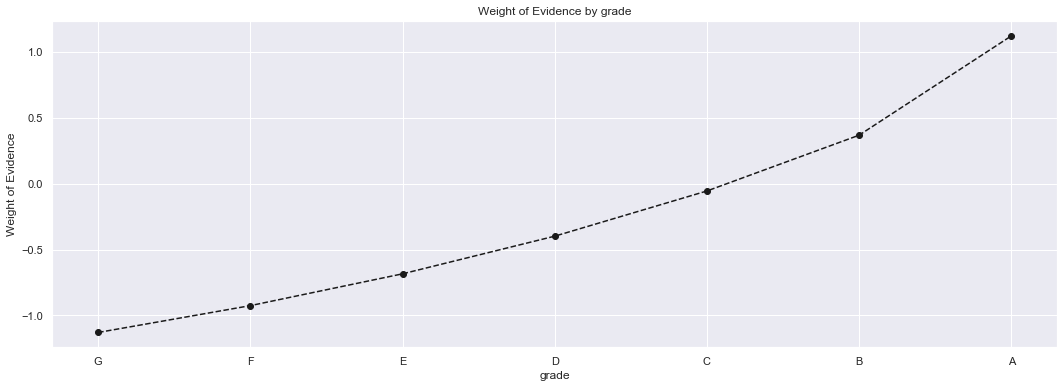

In [85]:
plot_by_woe(df_temp)

In [86]:
# preprocessing discrete ,creating dummy variable

In [87]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,146,0.794521,0.000391,116.0,30.0,0.000349,0.000737,-0.747088,NaN,NaN,0.022824
1,NONE,40,0.825000,0.000107,33.0,7.0,0.000099,0.000172,-0.548883,0.030479,0.198205,0.022824
2,RENT,150890,0.873795,0.404500,131847.0,19043.0,0.396755,0.467715,-0.164538,0.048795,0.384345,0.022824
3,OWN,33389,0.890443,0.089508,29731.0,3658.0,0.089467,0.089844,-0.004207,0.016647,0.160331,0.022824
4,MORTGAGE,188563,0.904663,0.505493,170586.0,17977.0,0.513329,0.441533,0.150666,0.014220,0.154873,0.022824


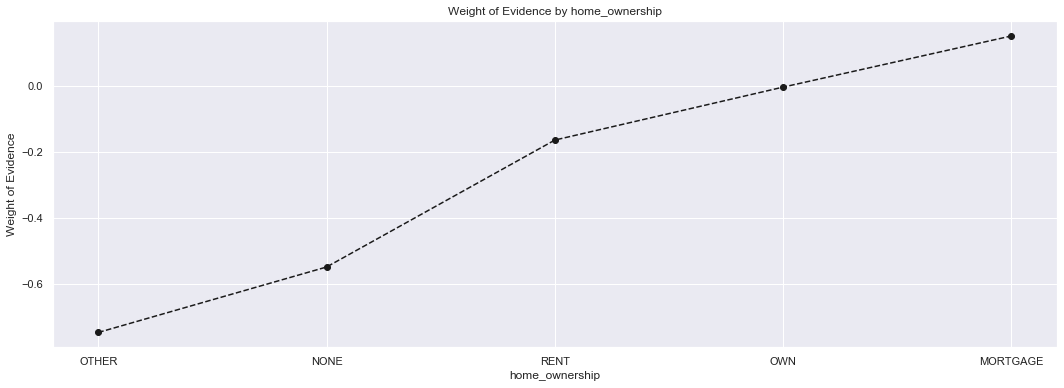

In [88]:
plot_by_woe(df_temp)

In [89]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'] , df_inputs_prepr['home_ownership:ANY']
                                                             ])

In [90]:
df_inputs_prepr

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,...,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY
55355,55355,9195762,11057846,35000,35000,35000.0,36 months,15.10,1215.01,C,C2,Loan Officer,7 years,MORTGAGE,120000.0,Source Verified,Dec-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Loan1,117xx,NY,6.81,0.0,Dec-92,2.0,NaN,NaN,11.0,0.0,41771,44.8,33.0,f,0.00,0.00,39624.825390,39624.83,35000.00,4624.83,0.0,0.0,0.000,Dec-14,27475.16,NaN,Dec-14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
201266,201266,1493324,1753639,4800,4800,4800.0,36 months,8.90,152.42,A,A5,Charles River Interactive LLC,< 1 year,RENT,45000.0,Source Verified,Sep-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 08/23/12 > Hi! I am lookin...,debt_consolidation,Vacation Fund!,023xx,MA,23.71,0.0,Oct-01,0.0,33.0,NaN,7.0,0.0,4185,62.5,14.0,f,0.00,0.00,5467.717974,5467.72,4800.00,667.72,0.0,0.0,0.000,Mar-15,1051.79,NaN,Jan-16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
83175,83175,7514703,9176844,9500,9500,9500.0,36 months,15.61,332.17,C,C3,border patrol agent,7 years,MORTGAGE,90000.0,Not Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 09/29/13 > I will be using...,debt_consolidation,debt consolidation,922xx,CA,13.68,1.0,Jun-00,1.0,9.0,NaN,7.0,0.0,2033,70.1,23.0,f,0.00,0.00,10884.235590,10884.24,9500.00,1384.24,0.0,0.0,0.000,Nov-14,6898.79,NaN,Sep-15,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
188356,188356,1681847,1964477,26000,26000,26000.0,36 months,7.90,813.55,A,A4,TLG Aerospace,< 1 year,RENT,104000.0,Verified,Nov-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/29/12 > Debt consolidat...,debt_consolidation,Debt Consolidation Loan,981xx,WA,18.17,0.0,Aug-99,0.0,NaN,NaN,6.0,0.0,913,91.3,31.0,f,0.00,0.00,28136.652780,28136.65,26000.00,2136.65,0.0,0.0,0.000,May-14,4209.52,NaN,Nov-15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
244824,244824,35723432,38418860,9000,9000,9000.0,36 months,6.49,275.81,A,A2,Public Affairs Officer,1 year,RENT,82000.0,Not Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,019xx,MA,25.64,1.0,Mar-96,1.0,21.0,NaN,7.0,0.0,35543,43.5,29.0,w,5949.50,5949.50,3579.040000,3579.04,3050.50,528.54,0.0,0.0,0.000,Jan-16,275.81,Feb-16,Jan-16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,.

In [91]:
# preprocessing , create dummy part 2 

In [92]:
df_inputs_prepr['addr_state'].unique()

array(['NY', 'MA', 'CA', 'WA', 'TX', 'MD', 'AZ', 'IN', 'NJ', 'AL', 'IL',
       'NM', 'VA', 'GA', 'CT', 'MO', 'WI', 'NC', 'NH', 'DC', 'OH', 'MI',
       'CO', 'OR', 'WY', 'FL', 'PA', 'TN', 'UT', 'SC', 'OK', 'MN', 'NV',
       'AR', 'KY', 'RI', 'WV', 'LA', 'KS', 'HI', 'AK', 'SD', 'MT', 'DE',
       'MS', 'VT', 'NE', 'IA', 'ID', 'ME'], dtype=object)

In [93]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr )
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.416667,0.000032,5.0,7.0,0.000015,0.000172,-2.435953,NaN,NaN,inf
1,IA,12,0.750000,0.000032,9.0,3.0,0.000027,0.000074,-1.000868,0.333333,1.435085,inf
2,NV,5159,0.864121,0.013830,4458.0,701.0,0.013415,0.017217,-0.249533,0.114121,0.751335,inf
3,HI,1988,0.873742,0.005329,1737.0,251.0,0.005227,0.006165,-0.165019,0.009622,0.084514,inf
4,FL,25457,0.876537,0.068244,22314.0,3143.0,0.067148,0.077195,-0.139444,0.002794,0.025575,inf
5,AL,4696,0.879046,0.012589,4128.0,568.0,0.012422,0.013951,-0.116054,0.002509,0.023390,inf
6,UT,2738,0.882031,0.007340,2415.0,323.0,0.007267,0.007933,-0.087678,0.002985,0.028375,inf
7,OK,3333,0.882088,0.008935,2940.0,393.0,0.008847,0.009652,-0.087125,0.000058,0.000553,inf
8,MO,5966,0.882836,0.015993,5267.0,699.0,0.015850,0.017168,-0.079915,0.000748,0.007210,inf
9,NY,32114,0.883104,0.086090,28360.0,3754.0,0.085341,0.092202,-0.077323,0.000268,0.002592,inf


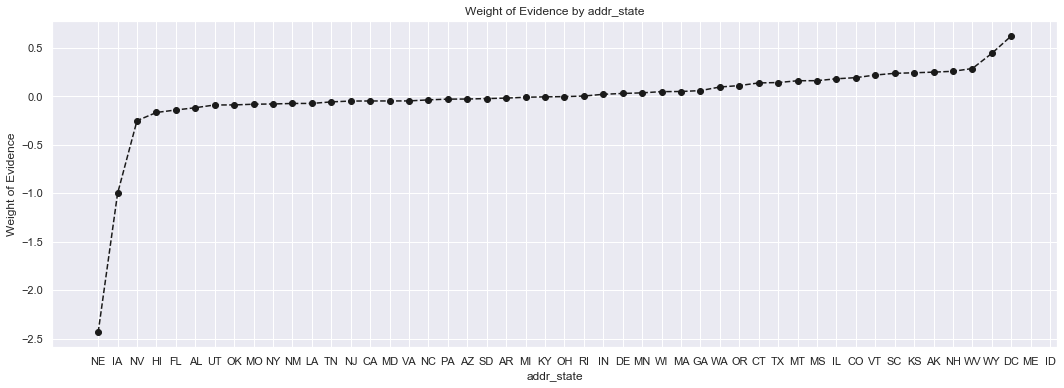

In [94]:
plot_by_woe(df_temp)

In [95]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

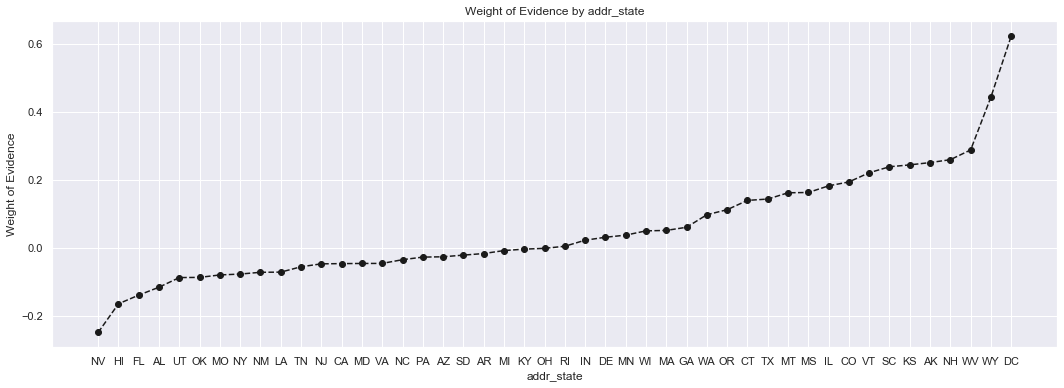

In [96]:
plot_by_woe(df_temp.iloc[2:-2, :])

In [97]:
# in risk managment : if we have no information -> we assume worst or highest risk

# 1st cate: first 6 state
# last cate: last 6 state (woe high and very low number of obs)

# group by woe -> into dummy

# since ny ,ca too many borrower- > we can make them in seperate group
# utah to nj -> 1 dummy (remember to check the number of borrower)
# ar - mn
# ri - in
# ga - or 
# wi -mt (lower number of obs) 
# tax ,il , ct : tx alone have too height observation so we have 2 cate -> 1. tx, 2 il and ct


In [98]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [99]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134571,0.873145,0.360753,117500.0,17071.0,0.353582,0.419280,-0.170424,NaN,NaN,0.020107
1,Source Verified,120021,0.895952,0.321748,107533.0,12488.0,0.323590,0.306717,0.053549,0.022807,0.223972,0.020107
2,Not Verified,118436,0.905806,0.317499,107280.0,11156.0,0.322828,0.274002,0.163984,0.009854,0.110435,0.020107


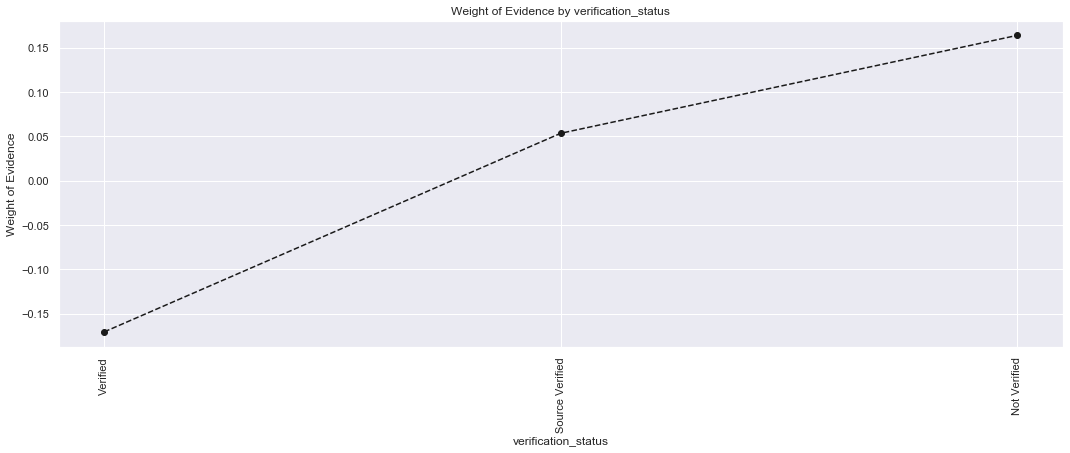

In [100]:
plot_by_woe(df_temp, 90)

In [101]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,338,0.778107,0.000906,263.0,75.0,0.000791,0.001842,-0.844815,NaN,NaN,0.034859
1,small_business,5582,0.788965,0.014964,4404.0,1178.0,0.013253,0.028933,-0.780786,0.010858,0.064029,0.034859
2,moving,2405,0.851143,0.006447,2047.0,358.0,0.006160,0.008793,-0.355883,0.062179,0.424902,0.034859
3,renewable_energy,283,0.855124,0.000759,242.0,41.0,0.000728,0.001007,-0.324115,0.003980,0.031768,0.034859
4,other,18967,0.862498,0.050846,16359.0,2608.0,0.049228,0.064055,-0.263286,0.007374,0.060829,0.034859
5,medical,3701,0.864631,0.009922,3200.0,501.0,0.009629,0.012305,-0.245181,0.002133,0.018105,0.034859
6,house,1760,0.864773,0.004718,1522.0,238.0,0.004580,0.005846,-0.243971,0.000142,0.001210,0.034859
7,vacation,1999,0.884942,0.005359,1769.0,230.0,0.005323,0.005649,-0.059390,0.020170,0.184581,0.034859
8,wedding,1881,0.885167,0.005043,1665.0,216.0,0.005010,0.005305,-0.057179,0.000225,0.002212,0.034859
9,debt_consolidation,219412,0.886857,0.588192,194587.0,24825.0,0.585553,0.609726,-0.040453,0.001689,0.016726,0.034859


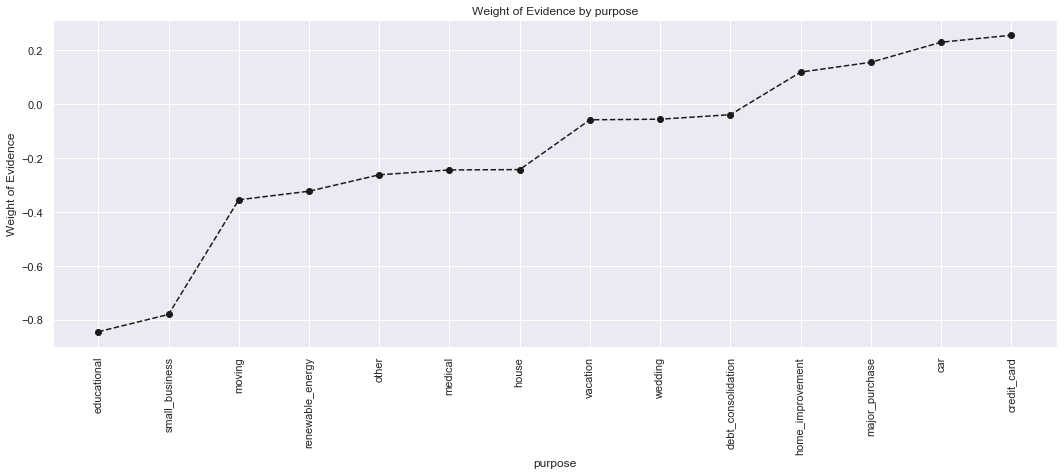

In [102]:
plot_by_woe(df_temp, 90)

In [103]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [104]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242596,0.87980,0.650343,213436.0,29160.0,0.642274,0.716198,-0.108942,NaN,NaN,0.025166
1,w,130432,0.91141,0.349657,118877.0,11555.0,0.357726,0.283802,0.231490,0.03161,0.340432,0.025166


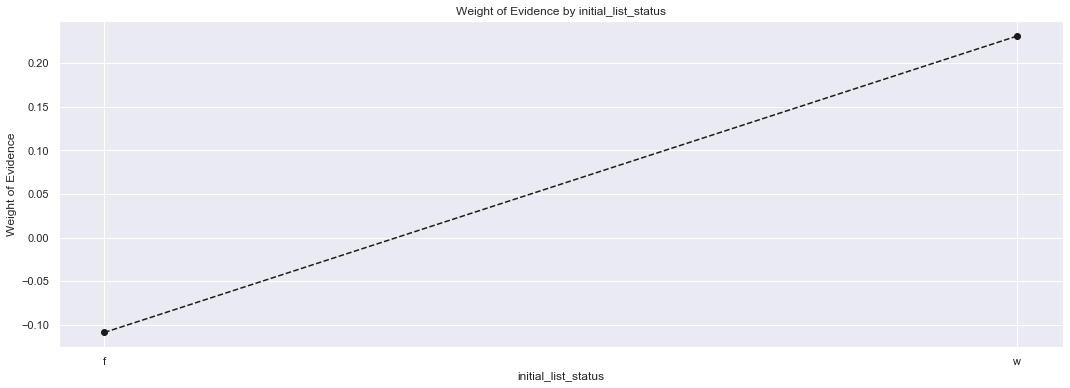

In [105]:
plot_by_woe(df_temp)


In [106]:
# preprocessing continuous variable 

# same but order by value (instead of woe)

In [107]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #     df = df.sort_values(['WoE'])
    #     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [108]:
# preprocessing continuous variable part1 

df_inputs_prepr['term_int'].unique()


array([36, 60], dtype=int64)

In [109]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270346,0.902654,0.724734,244029.0,26317.0,0.734335,0.646371,0.127591,NaN,NaN,0.036382
1,60,102682,0.859781,0.275266,88284.0,14398.0,0.265665,0.353629,-0.286011,0.042874,0.413602,0.036382


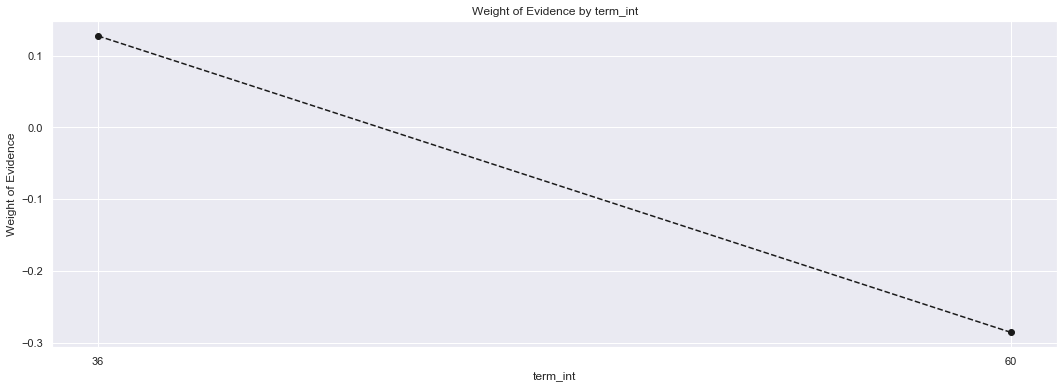

In [110]:
plot_by_woe(df_temp) #60 month will be ref category

In [111]:
df_inputs_prepr['terms:36'] = np.where((df_inputs_prepr["term_int"]==36),1 ,0)
df_inputs_prepr['terms:60'] = np.where((df_inputs_prepr["term_int"]==60),1 ,0)

In [112]:
df_inputs_prepr['emp_length_int'].unique()

array([ 7.,  0.,  1., 10.,  4.,  6.,  2.,  9.,  8.,  3.,  5.])

In [113]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45815,0.874866,0.122819,40082.0,5733.0,0.120615,0.140808,-0.154792,NaN,NaN,0.007316
1,1.0,23731,0.887995,0.063617,21073.0,2658.0,0.063413,0.065283,-0.029062,0.013128,0.125730,0.007316
2,2.0,33134,0.890505,0.088824,29506.0,3628.0,0.088790,0.089107,-0.003569,0.002511,0.025493,0.007316
3,3.0,29299,0.890850,0.078544,26101.0,3198.0,0.078543,0.078546,-0.000033,0.000344,0.003536,0.007316
4,4.0,22425,0.890256,0.060116,19964.0,2461.0,0.060076,0.060445,-0.006118,0.000593,0.006085,0.007316
5,5.0,24706,0.885291,0.066231,21872.0,2834.0,0.065817,0.069606,-0.055963,0.004965,0.049845,0.007316
6,6.0,20831,0.882435,0.055843,18382.0,2449.0,0.055315,0.060150,-0.083789,0.002856,0.027826,0.007316
7,7.0,20977,0.890118,0.056234,18672.0,2305.0,0.056188,0.056613,-0.007536,0.007683,0.076252,0.007316
8,8.0,17846,0.890340,0.047841,15889.0,1957.0,0.047813,0.048066,-0.005266,0.000222,0.002270,0.007316
9,9.0,14260,0.888850,0.038228,12675.0,1585.0,0.038142,0.038929,-0.020434,0.001490,0.015167,0.007316


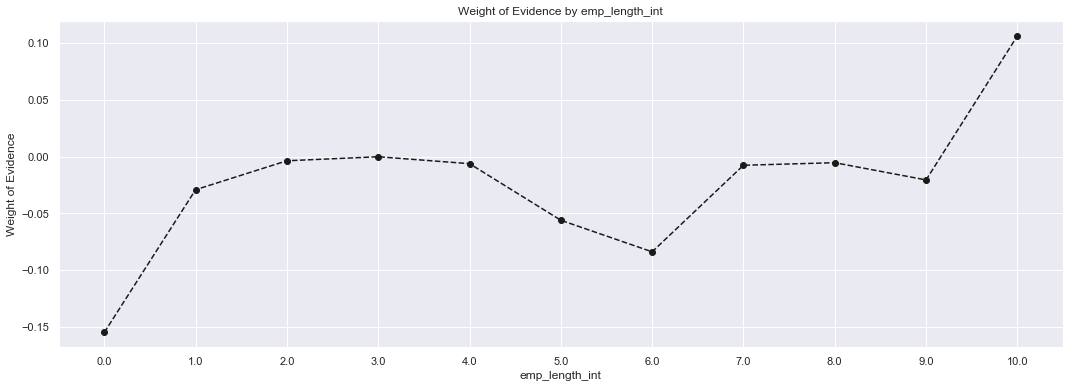

In [114]:
plot_by_woe(df_temp)

In [115]:
# to bundle above up

# 1st cate : 0 year -> is the riskiest so it will be ref for our model
# 2 : 1y 
# 3 : 2-4y (bc the woe not chg much)
# 4 : 5-6y 
# 5 : 7-9y
# 6 : 10y (bc woe much higher than the rest)

In [116]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)


In [117]:
# preprocessing continuous variable ,creating dummy part2 

In [118]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 48.,  63.,  50.,  61.,  37.,  56.,  57.,  66.,  52.,  42.,  45.,
        44.,  43.,  51.,  55.,  46.,  39.,  36.,  53.,  80.,  38.,  49.,
        41.,  54.,  47.,  78.,  68.,  40.,  71.,  91.,  62.,  92.,  59.,
        77.,  58.,  67.,  75.,  84.,  64.,  88.,  97.,  89., 110.,  65.,
        83.,  85.,  87., 100.,  72.,  76.,  60., 122.,  90., 114.,  81.,
        86.,  79.,  93.,  70., 111.,  96.,  74.,  69.,  73.,  98., 119.,
       101.,  95.,  82.,  94., 108.,  99., 105., 117., 120., 115., 104.,
       103., 116., 112., 123., 113., 106., 102., 107., 121., 118., 109.,
       124., 125., 126.])

In [119]:
# pd.cut   -> into 50 cate

df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'],50)

In [120]:
df_inputs_prepr['mths_since_issue_d_factor']

55355      (46.8, 48.6]
201266     (61.2, 63.0]
83175      (48.6, 50.4]
188356     (59.4, 61.2]
244824    (35.91, 37.8]
              ...      
333697     (39.6, 41.4]
176338     (57.6, 59.4]
96670      (50.4, 52.2]
345742     (39.6, 41.4]
397875     (41.4, 43.2]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [121]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr )
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28342,0.942559,0.075978,26714.0,1628.0,0.080388,0.039985,0.698355,NaN,NaN,0.114235
1,"(37.8, 39.6]",39560,0.930283,0.106051,36802.0,2758.0,0.110745,0.067739,0.491566,0.012276,0.206789,0.114235
2,"(39.6, 41.4]",38572,0.917686,0.103402,35397.0,3175.0,0.106517,0.077981,0.311839,0.012597,0.179727,0.114235
3,"(41.4, 43.2]",28943,0.907335,0.077589,26261.0,2682.0,0.079025,0.065873,0.182041,0.010351,0.129797,0.114235
4,"(43.2, 45.0]",28441,0.902570,0.076244,25670.0,2771.0,0.077246,0.068058,0.126634,0.004765,0.055407,0.114235
5,"(45.0, 46.8]",12133,0.898294,0.032526,10899.0,1234.0,0.032797,0.030308,0.078929,0.004276,0.047705,0.114235
6,"(46.8, 48.6]",24451,0.896282,0.065547,21915.0,2536.0,0.065947,0.062287,0.057103,0.002012,0.021827,0.114235
7,"(48.6, 50.4]",23008,0.886474,0.061679,20396.0,2612.0,0.061376,0.064153,-0.044258,0.009808,0.101361,0.114235
8,"(50.4, 52.2]",20627,0.880593,0.055296,18164.0,2463.0,0.054659,0.060494,-0.101419,0.005881,0.057161,0.114235
9,"(52.2, 54.0]",18261,0.867368,0.048953,15839.0,2422.0,0.047663,0.059487,-0.221599,0.013226,0.120180,0.114235


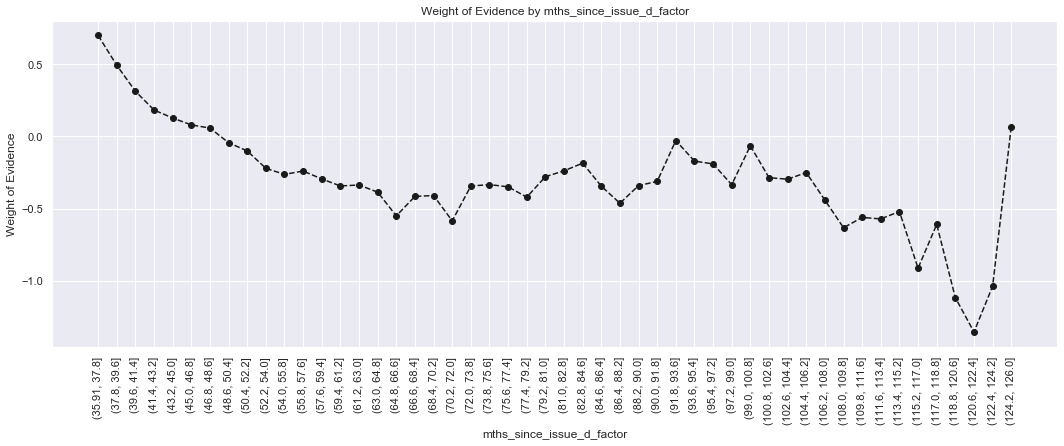

In [122]:
plot_by_woe(df_temp,90)

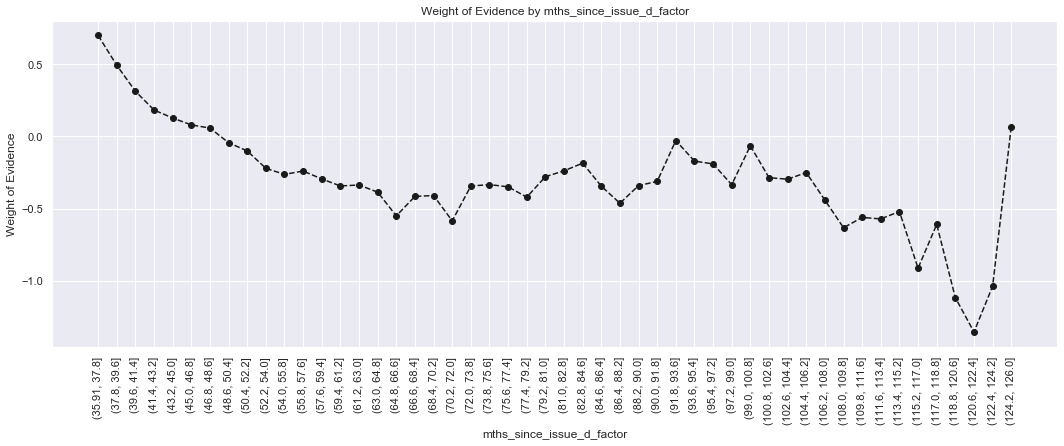

In [123]:
plot_by_woe(df_temp, 90)

In [124]:
# from above
# 1 ,2 ,3 seperate keep them seperate (since too high)


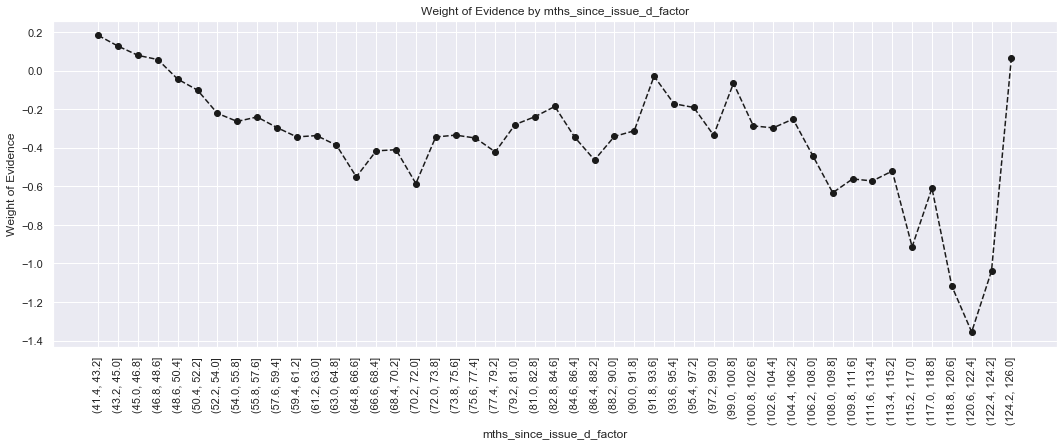

In [125]:
plot_by_woe(df_temp.iloc[3:,:], 90)

In [126]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [127]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [128]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",779,0.967908,0.002088,754.0,25.0,0.002269,0.000614,1.307036,NaN,NaN,0.34582
1,"(5.833, 6.246]",8403,0.979293,0.022526,8229.0,174.0,0.024763,0.004274,1.756884,0.011386,0.449848,0.34582
2,"(6.246, 6.658]",7870,0.972046,0.021098,7650.0,220.0,0.023020,0.005403,1.449353,0.007247,0.307531,0.34582
3,"(6.658, 7.071]",1811,0.970734,0.004855,1758.0,53.0,0.005290,0.001302,1.402159,0.001311,0.047193,0.34582
4,"(7.071, 7.484]",3161,0.974692,0.008474,3081.0,80.0,0.009271,0.001965,1.551502,0.003957,0.149343,0.34582
5,"(7.484, 7.897]",12658,0.962237,0.033933,12180.0,478.0,0.036652,0.011740,1.138459,0.012454,0.413043,0.34582
6,"(7.897, 8.31]",9709,0.950355,0.026028,9227.0,482.0,0.027766,0.011838,0.852464,0.011882,0.285995,0.34582
7,"(8.31, 8.722]",6608,0.965194,0.017714,6378.0,230.0,0.019193,0.005649,1.223050,0.014838,0.370585,0.34582
8,"(8.722, 9.135]",9628,0.941421,0.025810,9064.0,564.0,0.027275,0.013852,0.677531,0.023773,0.545519,0.34582
9,"(9.135, 9.548]",6594,0.965575,0.017677,6367.0,227.0,0.019160,0.005575,1.234453,0.024154,0.556922,0.34582


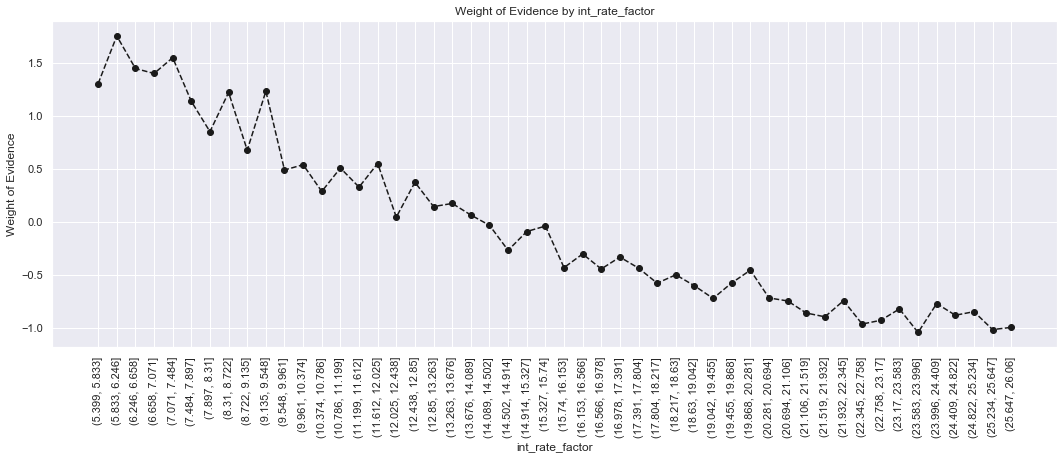

In [129]:
plot_by_woe(df_temp , 90)

# monotonic relationship -> easier to divide into group 

# the up and down at begining -> low obs let group them together

In [130]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [131]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1258,0.899046,0.003372,1131.0,127.0,0.003403,0.003119,0.087190,NaN,NaN,0.015189
1,"(1190.0, 1880.0]",3090,0.901294,0.008284,2785.0,305.0,0.008381,0.007491,0.112211,0.002248,0.025021,0.015189
2,"(1880.0, 2570.0]",6112,0.895615,0.016385,5474.0,638.0,0.016472,0.015670,0.049946,0.005679,0.062265,0.015189
3,"(2570.0, 3260.0]",7222,0.891166,0.019360,6436.0,786.0,0.019367,0.019305,0.003225,0.004449,0.046721,0.015189
4,"(3260.0, 3950.0]",4771,0.891008,0.012790,4251.0,520.0,0.012792,0.012772,0.001600,0.000158,0.001625,0.015189
5,"(3950.0, 4640.0]",9105,0.889292,0.024408,8097.0,1008.0,0.024366,0.024757,-0.015955,0.001717,0.017555,0.015189
6,"(4640.0, 5330.0]",15937,0.894459,0.042723,14255.0,1682.0,0.042896,0.041312,0.037643,0.005168,0.053599,0.015189
7,"(5330.0, 6020.0]",17043,0.906355,0.045688,15447.0,1596.0,0.046483,0.039199,0.170434,0.011895,0.132790,0.015189
8,"(6020.0, 6710.0]",6903,0.887006,0.018505,6123.0,780.0,0.018425,0.019158,-0.038967,0.019349,0.209401,0.015189
9,"(6710.0, 7400.0]",11704,0.898667,0.031376,10518.0,1186.0,0.031651,0.029129,0.083021,0.011661,0.121988,0.015189


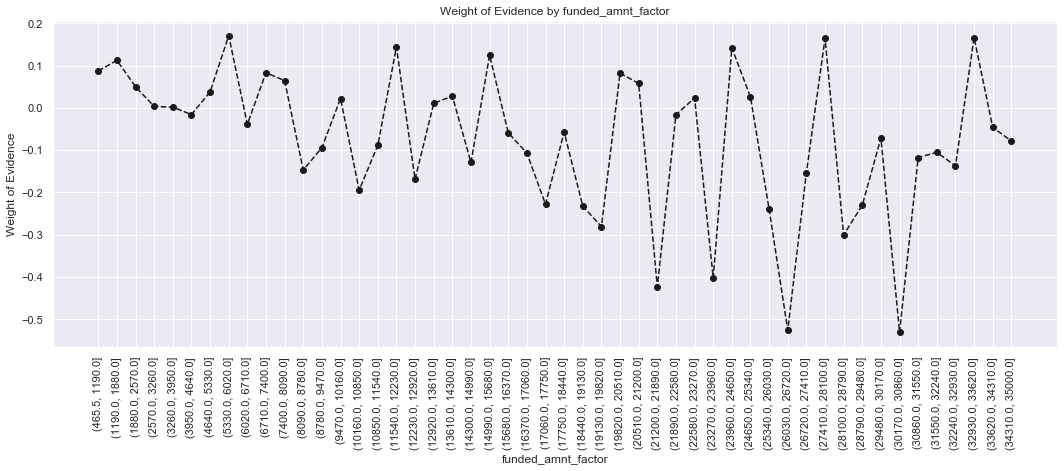

In [132]:
plot_by_woe(df_temp, 90)
# all look no prevalent relationshuip -> we may not use funded amount into model

In [133]:
# homework

df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",23,0.956522,0.000062,22.0,1.0,0.000066,0.000025,0.991562,NaN,NaN,0.016542
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016542
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016542
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016542
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016542
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016542
6,"(70.44, 82.18]",718,0.909471,0.001925,653.0,65.0,0.001965,0.001596,0.207709,NaN,NaN,0.016542
7,"(82.18, 93.92]",1965,0.889059,0.005268,1747.0,218.0,0.005257,0.005354,-0.018320,0.020412,0.226030,0.016542
8,"(93.92, 105.66]",2844,0.857947,0.007624,2440.0,404.0,0.007342,0.009923,-0.301142,0.031112,0.282822,0.016542
9,"(105.66, 117.4]",5060,0.869170,0.013565,4398.0,662.0,0.013235,0.016259,-0.205841,0.011223,0.095301,0.016542


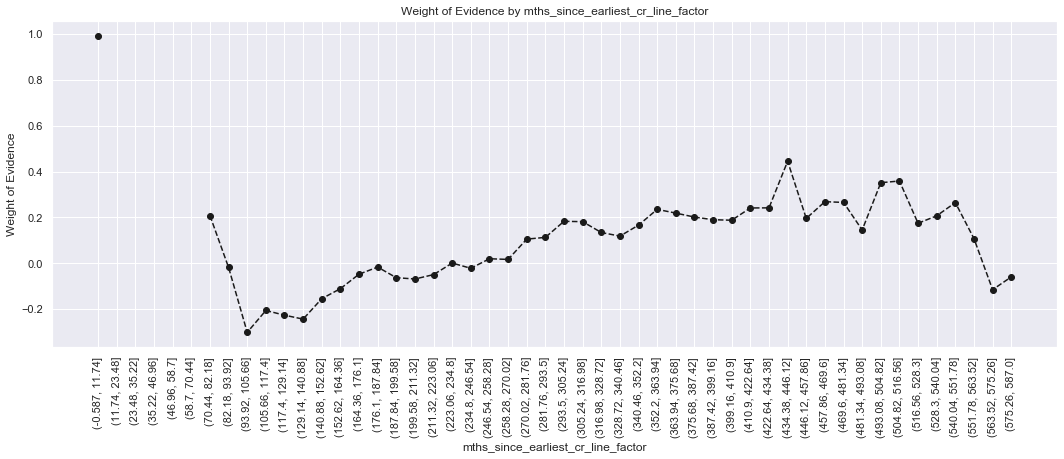

In [134]:
plot_by_woe(df_temp, 90)

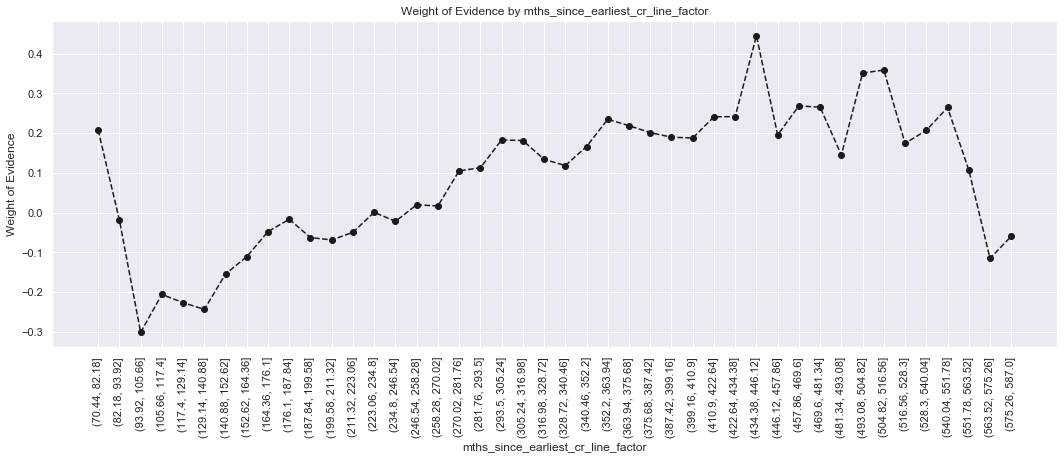

In [135]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [136]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [137]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306279,0.890760,0.821062,272821.0,33458.0,0.820976,0.821761,-0.000956,NaN,NaN,inf
1,1.0,44988,0.892660,0.120602,40159.0,4829.0,0.120847,0.118605,0.018726,0.001901,0.019682,inf
2,2.0,13075,0.888337,0.035051,11615.0,1460.0,0.034952,0.035859,-0.025620,0.004324,0.044346,inf
3,3.0,4603,0.887030,0.012340,4083.0,520.0,0.012287,0.012772,-0.038722,0.001306,0.013102,inf
4,4.0,1918,0.893639,0.005142,1714.0,204.0,0.005158,0.005010,0.028984,0.006609,0.067707,inf
5,5.0,994,0.889336,0.002665,884.0,110.0,0.002660,0.002702,-0.015504,0.004303,0.044488,inf
6,6.0,493,0.892495,0.001322,440.0,53.0,0.001324,0.001302,0.017002,0.003159,0.032506,inf
7,7.0,293,0.877133,0.000785,257.0,36.0,0.000773,0.000884,-0.133924,0.015362,0.150926,inf
8,8.0,135,0.903704,0.000362,122.0,13.0,0.000367,0.000319,0.139591,0.026571,0.273515,inf
9,9.0,89,0.910112,0.000239,81.0,8.0,0.000244,0.000196,0.215527,0.006409,0.075936,inf


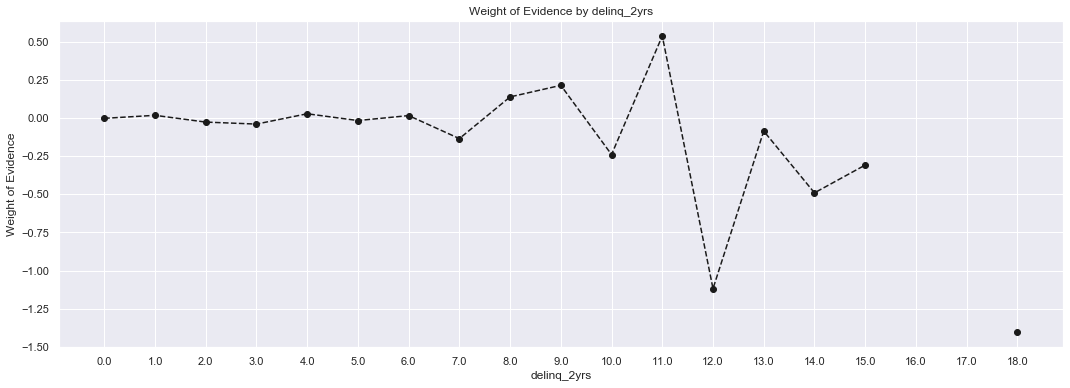

In [138]:
plot_by_woe(df_temp)

In [139]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [140]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908902,0.518009,175629.0,17603.0,0.528505,0.432347,0.200824,NaN,NaN,inf
1,1.0,104192,0.884694,0.279314,92178.0,12014.0,0.277383,0.295076,-0.061832,0.024209,0.262656,inf
2,2.0,46124,0.863932,0.123648,39848.0,6276.0,0.119911,0.154145,-0.251141,0.020762,0.189309,inf
3,3.0,20169,0.840894,0.054068,16960.0,3209.0,0.051036,0.078816,-0.434582,0.023038,0.183441,inf
4,4.0,5770,0.845061,0.015468,4876.0,894.0,0.014673,0.021958,-0.403106,0.004166,0.031476,inf
5,5.0,2221,0.829806,0.005954,1843.0,378.0,0.005546,0.009284,-0.515225,0.015254,0.112119,inf
6,6.0,955,0.779058,0.002560,744.0,211.0,0.002239,0.005182,-0.839298,0.050749,0.324073,inf
7,7.0,152,0.644737,0.000407,98.0,54.0,0.000295,0.001326,-1.503497,0.134321,0.664199,inf
8,8.0,97,0.649485,0.000260,63.0,34.0,0.000190,0.000835,-1.482707,0.004748,0.020791,inf
9,9.0,41,0.560976,0.000110,23.0,18.0,0.000069,0.000442,-1.854358,0.088509,0.371652,inf


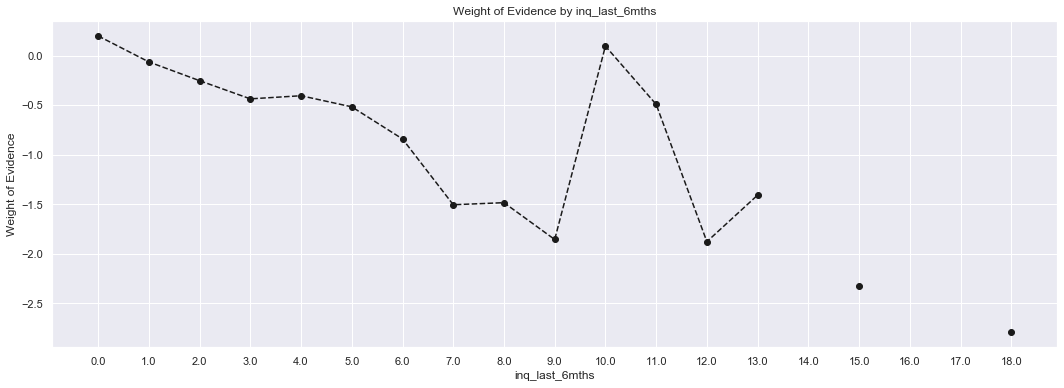

In [141]:
plot_by_woe(df_temp)

In [142]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [143]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,28,0.821429,0.000075,23.0,5.0,0.000069,0.000123,-0.573424,NaN,NaN,inf
1,1.0,104,0.875000,0.000279,91.0,13.0,0.000274,0.000319,-0.153571,0.053571,0.419854,inf
2,2.0,1450,0.841379,0.003887,1220.0,230.0,0.003671,0.005649,-0.430954,0.033621,0.277383,inf
3,3.0,4377,0.869317,0.011734,3805.0,572.0,0.011450,0.014049,-0.204548,0.027938,0.226405,inf
4,4.0,10080,0.890079,0.027022,8972.0,1108.0,0.026999,0.027214,-0.007929,0.020762,0.196620,inf
5,5.0,17309,0.894159,0.046401,15477.0,1832.0,0.046574,0.044996,0.034466,0.004080,0.042395,inf
6,6.0,24757,0.892434,0.066368,22094.0,2663.0,0.066486,0.065406,0.016372,0.001725,0.018094,inf
7,7.0,30098,0.892418,0.080686,26860.0,3238.0,0.080827,0.079528,0.016202,0.000016,0.000170,inf
8,8.0,33572,0.891308,0.089999,29923.0,3649.0,0.090045,0.089623,0.004694,0.001110,0.011508,inf
9,9.0,35146,0.888437,0.094218,31225.0,3921.0,0.093963,0.096304,-0.024608,0.002871,0.029302,inf


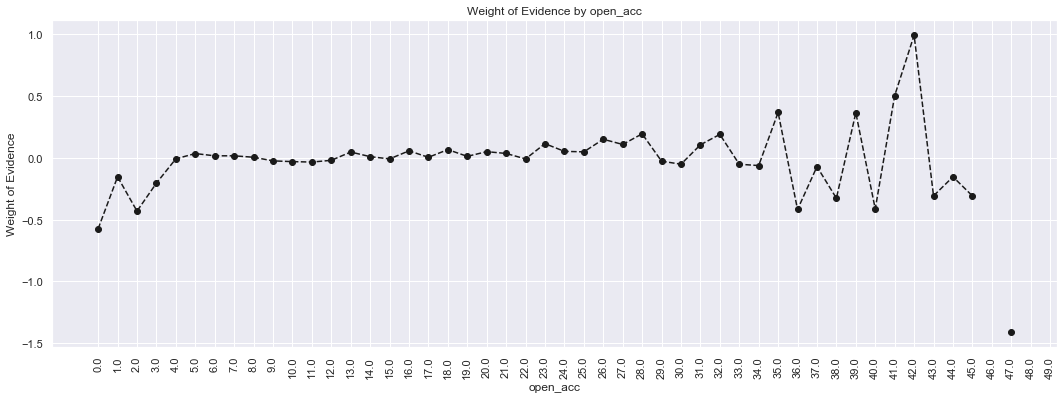

In [144]:
plot_by_woe(df_temp, 90)

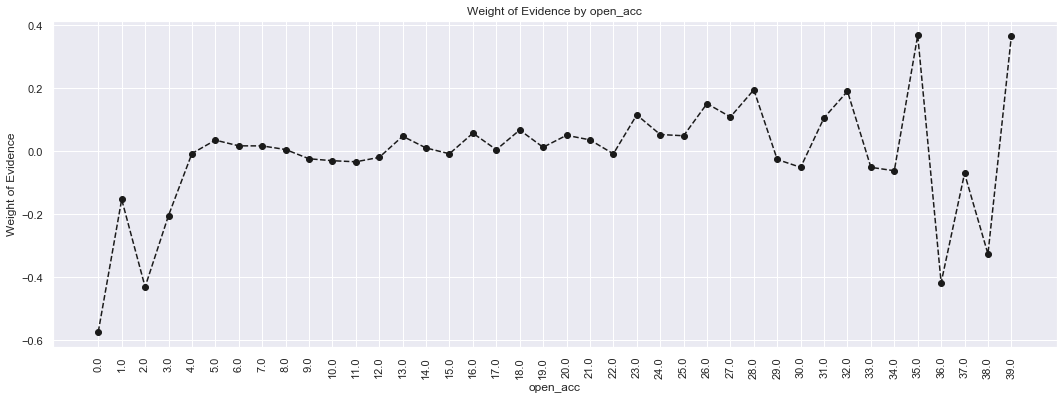

In [145]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [146]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [147]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323926,0.890046,0.868369,288309.0,35617.0,0.867583,0.874788,-0.008271,NaN,NaN,inf
1,1.0,42461,0.894044,0.113828,37962.0,4499.0,0.114236,0.110500,0.033250,0.003998,0.041521,inf
2,2.0,4493,0.906744,0.012045,4074.0,419.0,0.012260,0.010291,0.175029,0.012700,0.141779,inf
3,3.0,1290,0.914729,0.003458,1180.0,110.0,0.003551,0.002702,0.273309,0.007985,0.098280,inf
4,4.0,408,0.911765,0.001094,372.0,36.0,0.001119,0.000884,0.235894,0.002964,0.037414,inf
5,5.0,222,0.918919,0.000595,204.0,18.0,0.000614,0.000442,0.328268,0.007154,0.092373,inf
6,6.0,107,0.915888,0.000287,98.0,9.0,0.000295,0.000221,0.288262,0.003031,0.040005,inf
7,7.0,53,0.924528,0.000142,49.0,4.0,0.000147,0.000098,0.406045,0.008640,0.117783,inf
8,8.0,23,0.956522,0.000062,22.0,1.0,0.000066,0.000025,0.991562,0.031993,0.585517,inf
9,9.0,12,0.833333,0.000032,10.0,2.0,0.000030,0.000049,-0.490043,0.123188,1.481605,inf


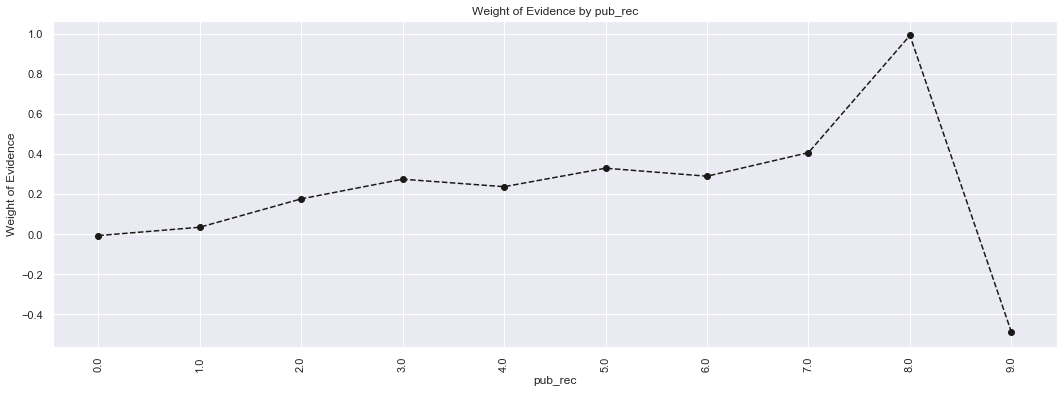

In [148]:
plot_by_woe(df_temp, 90)

In [149]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [150]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",464,0.808190,0.001244,375.0,89.0,0.001128,0.002186,-0.661191,NaN,NaN,inf
1,"(3.12, 6.24]",5921,0.862861,0.015873,5109.0,812.0,0.015374,0.019944,-0.260222,0.054671,0.400969,inf
2,"(6.24, 9.36]",15060,0.872444,0.040372,13139.0,1921.0,0.039538,0.047182,-0.176742,0.009583,0.083480,inf
3,"(9.36, 12.48]",25202,0.879018,0.067561,22153.0,3049.0,0.066663,0.074886,-0.116321,0.006574,0.060420,inf
4,"(12.48, 15.6]",33498,0.883665,0.089800,29601.0,3897.0,0.089076,0.095714,-0.071880,0.004647,0.044442,inf
5,"(15.6, 18.72]",38840,0.886843,0.104121,34445.0,4395.0,0.103652,0.107945,-0.040584,0.003179,0.031295,inf
6,"(18.72, 21.84]",40786,0.888344,0.109338,36232.0,4554.0,0.109030,0.111851,-0.025544,0.001501,0.015040,inf
7,"(21.84, 24.96]",40196,0.892178,0.107756,35862.0,4334.0,0.107916,0.106447,0.013707,0.003834,0.039251,inf
8,"(24.96, 28.08]",47272,0.895245,0.126725,42320.0,4952.0,0.127350,0.121626,0.045988,0.003066,0.032281,inf
9,"(28.08, 31.2]",29730,0.896636,0.079699,26657.0,3073.0,0.080217,0.075476,0.060917,0.001392,0.014929,inf


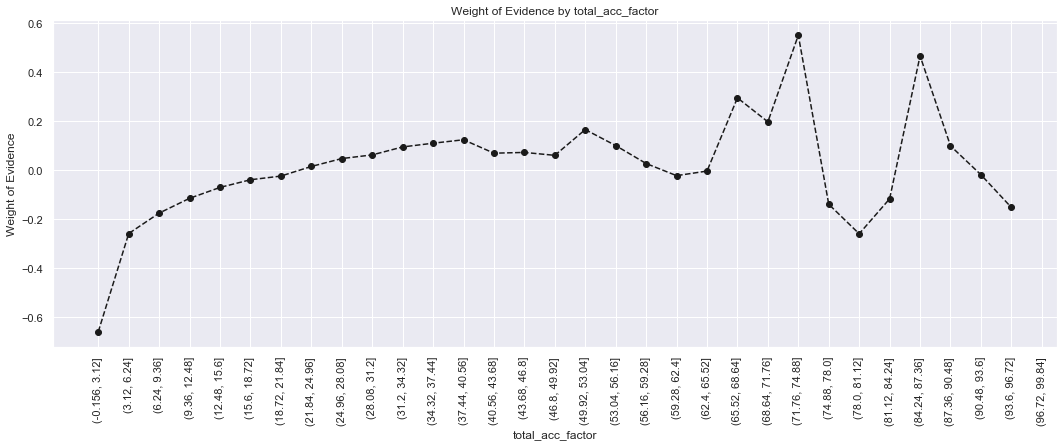

In [151]:
plot_by_woe(df_temp, 90)

In [152]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [153]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371641,0.890838,0.996282,331072.0,40569.0,0.996266,0.996414,-0.000149,NaN,NaN,inf
1,1.0,1297,0.895914,0.003477,1162.0,135.0,0.003497,0.003316,0.053142,0.005075,0.053292,inf
2,2.0,76,0.881579,0.000204,67.0,9.0,0.000202,0.000221,-0.092013,0.014335,0.145155,inf
3,3.0,8,0.875000,0.000021,7.0,1.0,0.000021,0.000025,-0.153571,0.006579,0.061558,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.125000,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.099481,0.500000,inf,inf


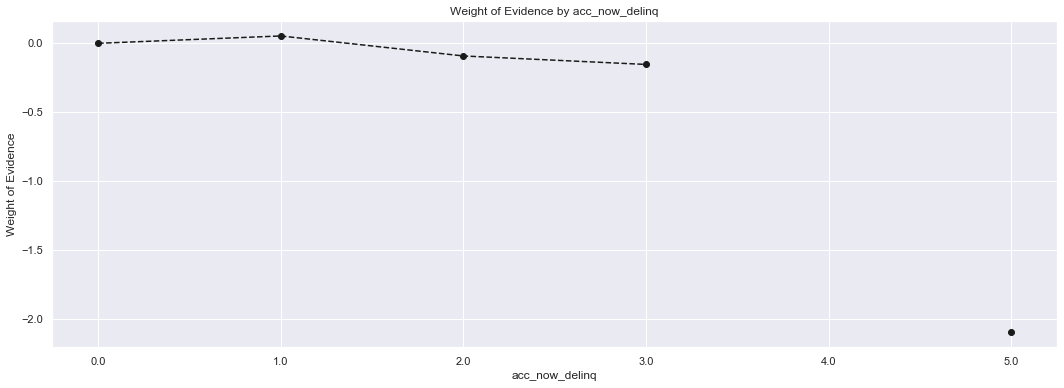

In [154]:
plot_by_woe(df_temp)

In [155]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [156]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19466,0.865201,0.052184,16842.0,2624.0,0.050681,0.064448,-0.240305,NaN,NaN,inf
1,"(5000.0, 9999.999]",52746,0.876180,0.141400,46215.0,6531.0,0.139071,0.160408,-0.142736,0.010979,0.097568,inf
2,"(9999.999, 14999.998]",59480,0.880161,0.159452,52352.0,7128.0,0.157538,0.175071,-0.105521,0.003981,0.037215,inf
3,"(14999.998, 19999.998]",51357,0.878342,0.137676,45109.0,6248.0,0.135743,0.153457,-0.122660,0.001820,0.017139,inf
4,"(19999.998, 24999.997]",41628,0.886927,0.111595,36921.0,4707.0,0.111103,0.115608,-0.039751,0.008585,0.082909,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


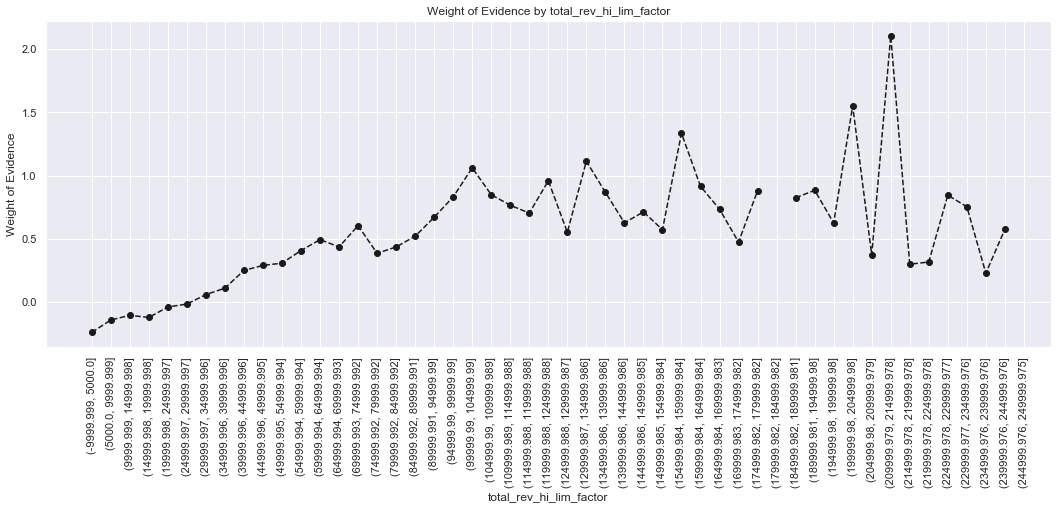

In [157]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [158]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [159]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1885,0.896021,0.005053,1689.0,196.0,0.005083,0.004814,0.054297,NaN,NaN,0.013687
1,"(43.556, 71.443]",4896,0.899306,0.013125,4403.0,493.0,0.013250,0.012109,0.090052,0.003284,0.035755,0.013687
2,"(71.443, 99.329]",6894,0.895271,0.018481,6172.0,722.0,0.018573,0.017733,0.046272,0.004034,0.043779,0.013687
3,"(99.329, 127.216]",9146,0.893724,0.024518,8174.0,972.0,0.024597,0.023873,0.029877,0.001547,0.016395,0.013687
4,"(127.216, 155.102]",10090,0.893756,0.027049,9018.0,1072.0,0.027137,0.026329,0.030216,0.000032,0.000339,0.013687
5,"(155.102, 182.988]",16796,0.894558,0.045026,15025.0,1771.0,0.045213,0.043497,0.038690,0.000802,0.008475,0.013687
6,"(182.988, 210.875]",17057,0.904848,0.045726,15434.0,1623.0,0.046444,0.039862,0.152816,0.010290,0.114125,0.013687
7,"(210.875, 238.761]",15054,0.901887,0.040356,13577.0,1477.0,0.040856,0.036277,0.118883,0.002962,0.033932,0.013687
8,"(238.761, 266.648]",18731,0.900219,0.050213,16862.0,1869.0,0.050741,0.045904,0.100178,0.001668,0.018705,0.013687
9,"(266.648, 294.534]",19985,0.890368,0.053575,17794.0,2191.0,0.053546,0.053813,-0.004977,0.009851,0.105156,0.013687


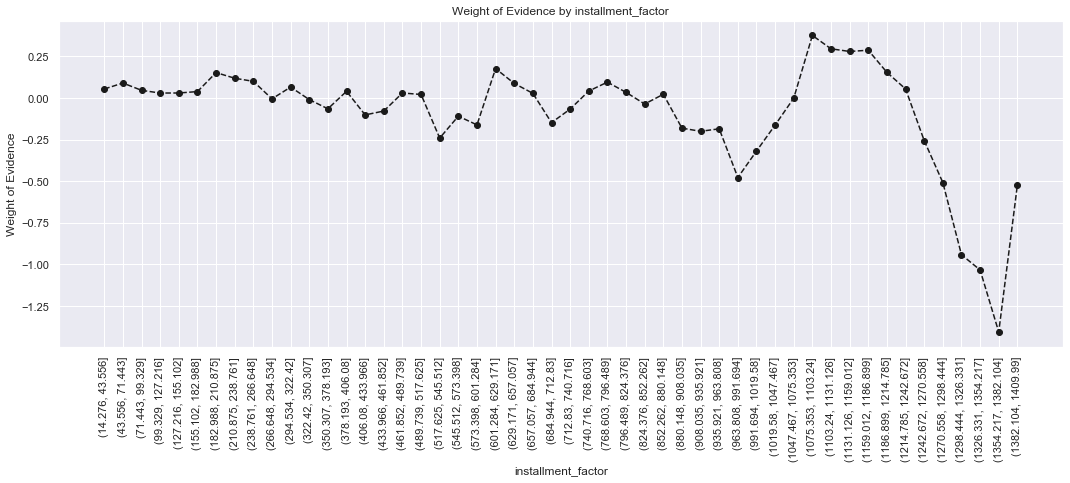

In [160]:
plot_by_woe(df_temp, 90)

In [161]:
# preprocessing dummy part3

In [162]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

# 50 not enough

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5548.499, 150785.98]",356479,0.889144,0.955646,316961.0,39518.0,0.953814,0.970601,-0.017446,NaN,NaN,inf
1,"(150785.98, 299675.96]",14496,0.926807,0.038861,13435.0,1061.0,0.040429,0.026059,0.439183,0.037664,4.566289e-01,inf
2,"(299675.96, 448565.94]",1465,0.930375,0.003927,1363.0,102.0,0.004102,0.002505,0.493002,0.003568,5.381924e-02,inf
3,"(448565.94, 597455.92]",314,0.942675,0.000842,296.0,18.0,0.000891,0.000442,0.700519,0.012300,2.075171e-01,inf
4,"(597455.92, 746345.9]",117,0.923077,0.000314,108.0,9.0,0.000325,0.000221,0.385438,0.019598,3.150810e-01,inf
5,"(746345.9, 895235.88]",65,0.923077,0.000174,60.0,5.0,0.000181,0.000123,0.385438,0.000000,1.665335e-16,inf
6,"(895235.88, 1044125.86]",42,0.976190,0.000113,41.0,1.0,0.000123,0.000025,1.614103,0.053114,1.228665e+00,inf
7,"(1044125.86, 1193015.84]",11,1.000000,0.000029,11.0,0.0,0.000033,0.000000,inf,0.023810,inf,inf
8,"(1193015.84, 1341905.82]",15,0.933333,0.000040,14.0,1.0,0.000042,0.000025,0.539589,0.066667,inf,inf
9,"(1341905.82, 1490795.8]",3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.066667,inf,inf


In [163]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

# observation lower with higher income

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5548.499, 76340.99]",244688,0.877207,0.655958,214642.0,30046.0,0.645911,0.737959,-0.133227,NaN,NaN,inf
1,"(76340.99, 150785.98]",111791,0.915270,0.299688,102319.0,9472.0,0.307903,0.232642,0.280287,0.038064,0.413513,inf
2,"(150785.98, 225230.97]",12082,0.927247,0.032389,11203.0,879.0,0.033713,0.021589,0.445683,0.011977,0.165397,inf
3,"(225230.97, 299675.96]",2414,0.924606,0.006471,2232.0,182.0,0.006717,0.004470,0.407178,0.002641,0.038505,inf
4,"(299675.96, 374120.95]",1093,0.930467,0.002930,1017.0,76.0,0.003060,0.001867,0.494410,0.005860,0.087232,inf
5,"(374120.95, 448565.94]",372,0.930108,0.000997,346.0,26.0,0.001041,0.000639,0.488874,0.000359,0.005537,inf
6,"(448565.94, 523010.93]",239,0.958159,0.000641,229.0,10.0,0.000689,0.000246,1.031668,0.028051,0.542795,inf
7,"(523010.93, 597455.92]",75,0.893333,0.000201,67.0,8.0,0.000202,0.000196,0.025782,0.064826,1.005886,inf
8,"(597455.92, 671900.91]",85,0.941176,0.000228,80.0,5.0,0.000241,0.000123,0.673120,0.047843,0.647338,inf
9,"(671900.91, 746345.9]",32,0.875000,0.000086,28.0,4.0,0.000084,0.000098,-0.153559,0.066176,0.826679,inf


In [164]:
# let aassume around > 140,000 -> high inc


In [165]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]


In [166]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.690489,NaN,NaN,0.052907
1,"(4658.08, 7420.16]",40,0.825000,0.000114,33.0,7.0,0.000106,0.000179,-0.526186,0.025000,0.164303,0.052907
2,"(7420.16, 10182.24]",289,0.847751,0.000824,245.0,44.0,0.000786,0.001126,-0.359715,0.022751,0.166471,0.052907
3,"(10182.24, 12944.32]",548,0.824818,0.001562,452.0,96.0,0.001449,0.002456,-0.527449,0.022933,0.167735,0.052907
4,"(12944.32, 15706.4]",1229,0.838080,0.003502,1030.0,199.0,0.003303,0.005092,-0.432774,0.013262,0.094675,0.052907
5,"(15706.4, 18468.48]",1527,0.844794,0.004351,1290.0,237.0,0.004137,0.006064,-0.382446,0.006714,0.050328,0.052907
6,"(18468.48, 21230.56]",2928,0.850410,0.008344,2490.0,438.0,0.007985,0.011207,-0.338964,0.005616,0.043482,0.052907
7,"(21230.56, 23992.64]",2567,0.842618,0.007315,2163.0,404.0,0.006936,0.010337,-0.398947,0.007792,0.059983,0.052907
8,"(23992.64, 26754.72]",7163,0.850063,0.020412,6089.0,1074.0,0.019526,0.027480,-0.341690,0.007445,0.057257,0.052907
9,"(26754.72, 29516.8]",5568,0.852191,0.015867,4745.0,823.0,0.015216,0.021058,-0.324893,0.002128,0.016797,0.052907


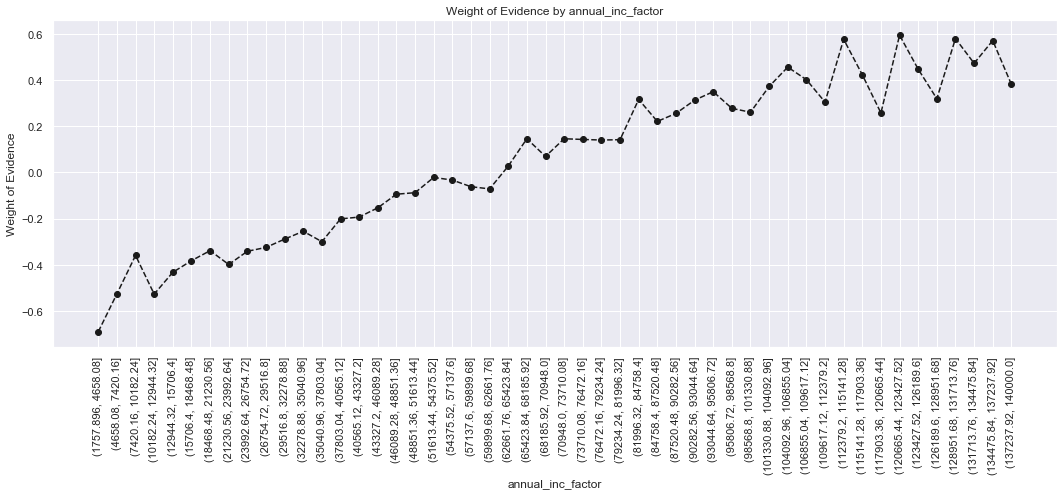

In [167]:
plot_by_woe(df_temp , 90)
# kninda similar to interest rate ,in dif direcction

In [168]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [169]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.18, 3.6]",5338,0.872237,0.030868,4656.0,682.0,0.030178,0.036580,-0.192401,NaN,NaN,inf
1,"(3.6, 7.2]",11086,0.886975,0.064107,9833.0,1253.0,0.063732,0.067207,-0.053080,0.014738,0.139321,inf
2,"(7.2, 10.8]",10200,0.893039,0.058983,9109.0,1091.0,0.059040,0.058517,0.008885,0.006065,0.061965,inf
3,"(10.8, 14.4]",13203,0.891616,0.076349,11772.0,1431.0,0.076300,0.076754,-0.005933,0.001424,0.014818,inf
4,"(14.4, 18.0]",12537,0.891441,0.072498,11176.0,1361.0,0.072437,0.072999,-0.007735,0.000174,0.001801,inf
5,"(18.0, 21.6]",8870,0.888613,0.051292,7882.0,988.0,0.051087,0.052993,-0.036629,0.002828,0.028895,inf
6,"(21.6, 25.2]",10974,0.896938,0.063459,9843.0,1131.0,0.063797,0.060663,0.050375,0.008325,0.087004,inf
7,"(25.2, 28.8]",8152,0.894382,0.047140,7291.0,861.0,0.047256,0.046181,0.023018,0.002556,0.027357,inf
8,"(28.8, 32.4]",10158,0.897519,0.058741,9117.0,1041.0,0.059092,0.055836,0.056675,0.003137,0.033658,inf
9,"(32.4, 36.0]",9857,0.898752,0.057000,8859.0,998.0,0.057419,0.053529,0.070152,0.001233,0.013477,inf


In [170]:
# create dummy for missing value cate

In [171]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


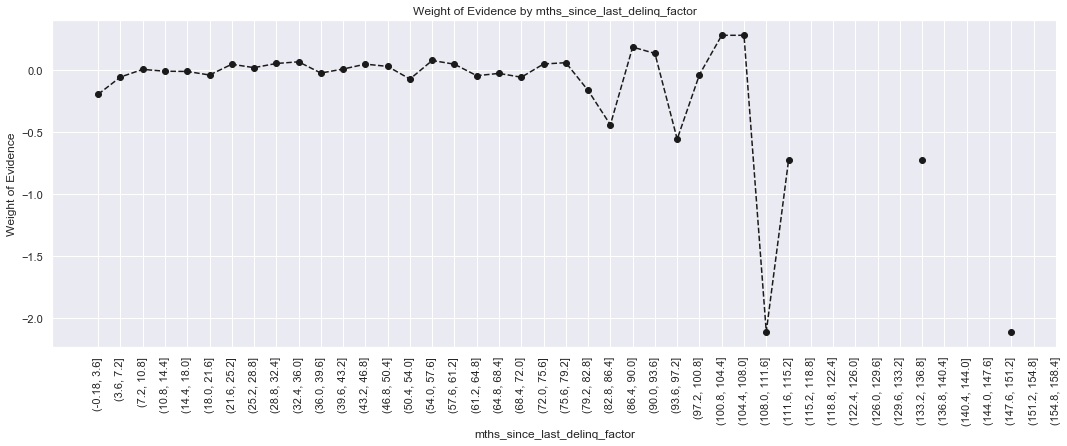

In [172]:
plot_by_woe(df_temp, 90)

In [173]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [174]:
#homeworkj

In [175]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",744,0.879032,0.001994,654.0,90.0,0.001968,0.002210,-0.116183,NaN,NaN,0.031123
1,"(0.4, 0.8]",774,0.912145,0.002075,706.0,68.0,0.002125,0.001670,0.240627,0.033112,0.356810,0.031123
2,"(0.8, 1.2]",914,0.896061,0.002450,819.0,95.0,0.002465,0.002333,0.054726,0.016083,0.185900,0.031123
3,"(1.2, 1.6]",1043,0.902205,0.002796,941.0,102.0,0.002832,0.002505,0.122490,0.006144,0.067763,0.031123
4,"(1.6, 2.0]",1150,0.904348,0.003083,1040.0,110.0,0.003130,0.002702,0.147015,0.002143,0.024525,0.031123
5,"(2.0, 2.399]",1338,0.917788,0.003587,1228.0,110.0,0.003695,0.002702,0.313181,0.013440,0.166166,0.031123
6,"(2.399, 2.799]",1502,0.920107,0.004027,1382.0,120.0,0.004159,0.002947,0.344315,0.002319,0.031134,0.031123
7,"(2.799, 3.199]",1722,0.901278,0.004616,1552.0,170.0,0.004670,0.004175,0.112021,0.018829,0.232294,0.031123
8,"(3.199, 3.599]",1940,0.903093,0.005201,1752.0,188.0,0.005272,0.004617,0.132591,0.001815,0.020570,0.031123
9,"(3.599, 3.999]",2250,0.914222,0.006032,2057.0,193.0,0.006190,0.004740,0.266833,0.011129,0.134242,0.031123


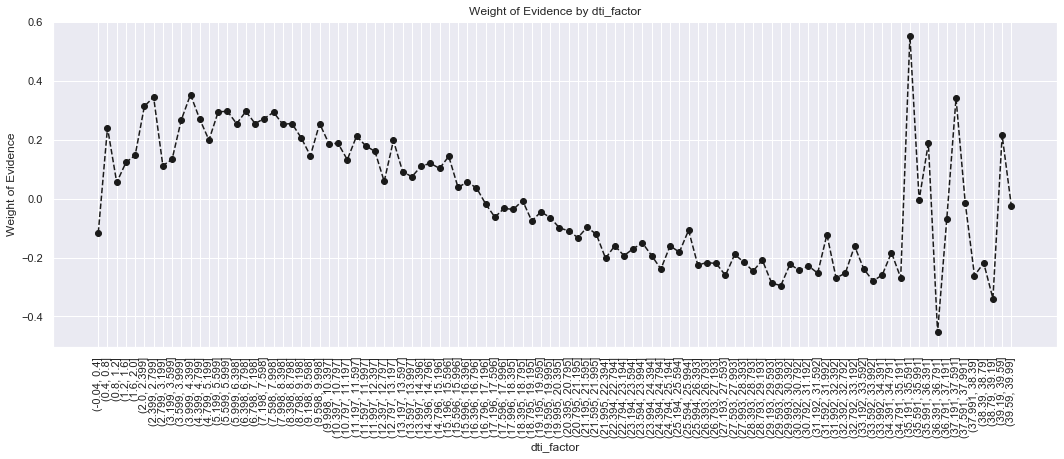

In [176]:
plot_by_woe(df_temp, 90)

In [177]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [178]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1334,0.891304,0.003604,1189.0,145.0,0.003606,0.003590,0.004459,NaN,NaN,0.029881
1,"(0.7, 1.4]",1641,0.897623,0.004433,1473.0,168.0,0.004467,0.004159,0.071417,0.006319,0.066958,0.029881
2,"(1.4, 2.1]",1974,0.912867,0.005333,1802.0,172.0,0.005465,0.004258,0.249483,0.015244,0.178066,0.029881
3,"(2.1, 2.8]",2560,0.915625,0.006916,2344.0,216.0,0.007108,0.005347,0.284660,0.002758,0.035178,0.029881
4,"(2.8, 3.5]",3187,0.904926,0.008610,2884.0,303.0,0.008746,0.007501,0.153525,0.010699,0.131135,0.029881
5,"(3.5, 4.2]",3898,0.914058,0.010531,3563.0,335.0,0.010805,0.008294,0.264552,0.009132,0.111027,0.029881
6,"(4.2, 4.9]",4584,0.914049,0.012384,4190.0,394.0,0.012707,0.009754,0.264430,0.000010,0.000123,0.029881
7,"(4.9, 5.6]",5319,0.913706,0.014370,4860.0,459.0,0.014738,0.011363,0.260068,0.000343,0.004362,0.029881
8,"(5.6, 6.3]",5947,0.914411,0.016067,5438.0,509.0,0.016491,0.012601,0.269043,0.000705,0.008975,0.029881
9,"(6.3, 7.0]",6543,0.914871,0.017677,5986.0,557.0,0.018153,0.013790,0.274938,0.000460,0.005895,0.029881


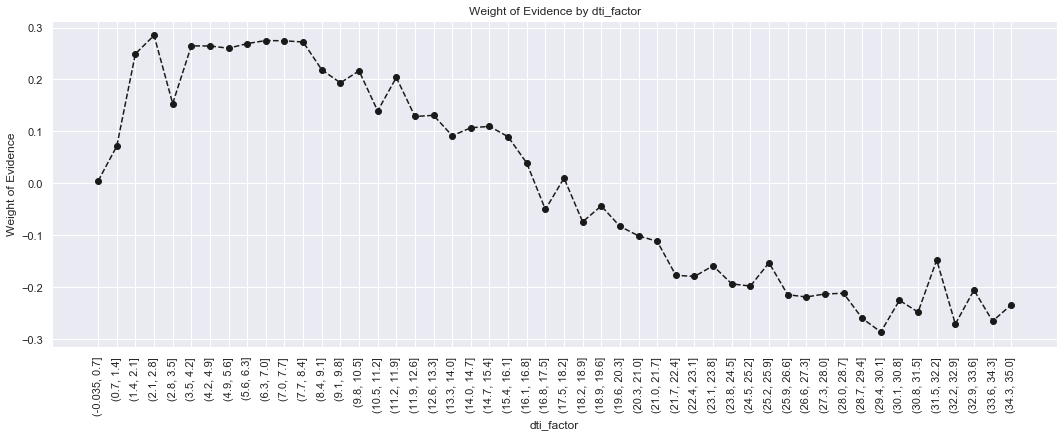

In [179]:
plot_by_woe(df_temp, 90)

In [180]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [181]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1054,0.760911,0.021032,802.0,252.0,0.017915,0.047138,-0.967465,NaN,NaN,inf
1,"(2.58, 5.16]",118,0.889831,0.002355,105.0,13.0,0.002345,0.002432,-0.036134,0.128920,0.931331,inf
2,"(5.16, 7.74]",120,0.908333,0.002395,109.0,11.0,0.002435,0.002058,0.168308,0.018503,0.204442,inf
3,"(7.74, 10.32]",251,0.928287,0.005009,233.0,18.0,0.005205,0.003367,0.435522,0.019954,0.267214,inf
4,"(10.32, 12.9]",200,0.900000,0.003991,180.0,20.0,0.004021,0.003741,0.072080,0.028287,0.363442,inf
5,"(12.9, 15.48]",321,0.912773,0.006405,293.0,28.0,0.006545,0.005238,0.222823,0.012773,0.150744,inf
6,"(15.48, 18.06]",341,0.897361,0.006804,306.0,35.0,0.006835,0.006547,0.043092,0.015412,0.179731,inf
7,"(18.06, 20.64]",258,0.926357,0.005148,239.0,19.0,0.005339,0.003554,0.406880,0.028996,0.363788,inf
8,"(20.64, 23.22]",437,0.917620,0.008720,401.0,36.0,0.008957,0.006734,0.285298,0.008736,0.121582,inf
9,"(23.22, 25.8]",319,0.899687,0.006365,287.0,32.0,0.006411,0.005986,0.068601,0.017934,0.216696,inf


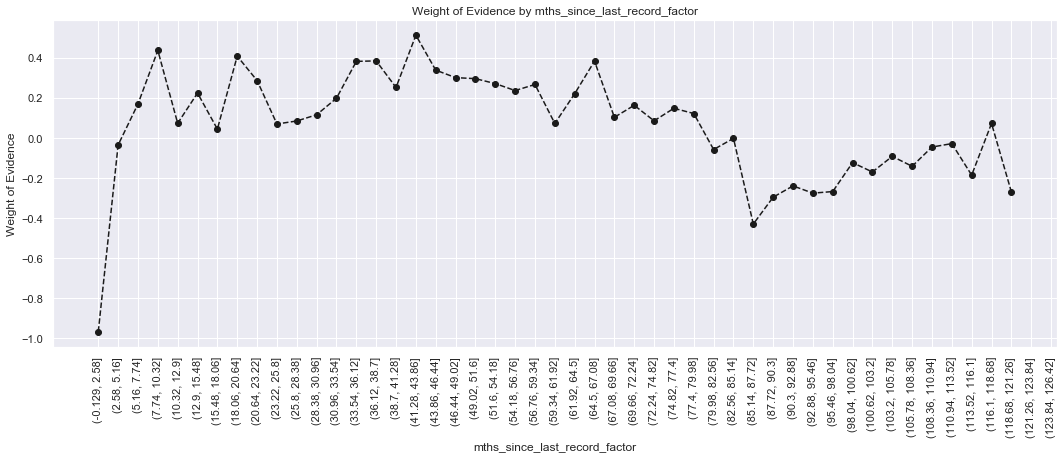

In [182]:
plot_by_woe(df_temp, 90)

In [183]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

In [184]:
# preprocessing dataset

In [185]:
# df_targets_prepr

In [186]:
loan_data_inputs_train = df_inputs_prepr

In [187]:
df_inputs_prepr = loan_data_inputs_test
df_target_prepr =  loan_data_targets_test

## re run everything after train test split then continue

In [188]:
loan_data_inputs_test  = df_inputs_prepr

In [189]:
from transformation_ import transformation_all

In [190]:
# def transfromation_all(df_targets_prepr , df_inputs_prepr_ ):
    
#     import pandas as pd
#     import numpy as np
    
#     pd.options.mode.chained_assignment = None  # default='warn'
#     import warnings
#     warnings.filterwarnings("ignore", category=RuntimeWarning) 
#     df_inputs_prepr = df_inputs_prepr_.copy()
#     df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
    
#     df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
#                     df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
    
#     df1 = df1.iloc[:, [0,1,3]]
#     df1.columns = [df1.columns.values[0], 'n_obs','prop_good']
    
#     df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    
#     df1['n_good'] = df1['prop_good']* df1['n_obs']
#     df1['n_bad'] = (1- df1['prop_good']) *df1['n_obs']
    
    
#     df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
#     df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
    
#     df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
    
#     df1 = df1.sort_values(['WoE'])
#     df1 = df1.reset_index(drop= True)
    
#     df1['diff_prop_good'] = df1['prop_good'].diff().abs()
#     df1['diff_WoE'] = df1['WoE'].diff().abs()
    
    
#     df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])* df1['WoE']
#     df1['IV'] = df1['IV'].sum()
    
    
    
#     def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
#         df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
#         df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
#                     df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
#         df = df.iloc[:, [0, 1, 3]]
#         df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
#         df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#         df['n_good'] = df['prop_good'] * df['n_obs']
#         df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
#         df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#         df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#         df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#         df = df.sort_values(['WoE'])
#         df = df.reset_index(drop = True)
#         df['diff_prop_good'] = df['prop_good'].diff().abs()
#         df['diff_WoE'] = df['WoE'].diff().abs()
#         df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#         df['IV'] = df['IV'].sum()
#         return df
        
    
    
#     df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
    
    
#     def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
#         x = np.array(df_WoE.iloc[:,0].apply(str))
#         y = df_WoE['WoE']
#         plt.figure(figsize = (18,6))
#         plt.plot(x , y, marker = 'o', linestyle = '--' ,color = 'k') # marker = dot
#         plt.xlabel(df_WoE.columns[0])
#         plt.ylabel('Weight of Evidence')
#         plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
#         plt.xticks(rotation = rotation_of_x_axis_labels)
    
    
#     df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
    
#     df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
#                                                                 df_inputs_prepr['home_ownership:NONE'] , df_inputs_prepr['home_ownership:ANY']
#                                                                  ])
    
    
    
    
    
    
#     df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr )
    
    
#     if ['addr_state:ND'] in df_inputs_prepr.columns.values:
#         pass
#     else:
#         df_inputs_prepr['addr_state:ND'] = 0
    
    
#     df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
#                                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
#                                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
#                                                              df_inputs_prepr['addr_state:AL']])
    
#     df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])
    
#     df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
#                                                   df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
#                                                   df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])
    
#     df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
#                                                   df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])
    
#     df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
#                                                   df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
#                                                   df_inputs_prepr['addr_state:MN']])
    
#     df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
#                                                   df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
#                                                   df_inputs_prepr['addr_state:IN']])
    
#     df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
#                                                   df_inputs_prepr['addr_state:OR']])
    
#     df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])
    
#     df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])
    
#     df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
#                                                   df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
#                                                   df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])
    
#     df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
#                                                   df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
#                                                   df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])
    
    
    
    
    
#     df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
    
#     df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
    
    
#     df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
#                                                                      df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
#                                                                      df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
#     df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
#                                                  df_inputs_prepr['purpose:vacation']])
#     df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
#                                                             df_inputs_prepr['purpose:home_improvement']])
    
    
    
#     df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
    
    
    
#     def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
#         df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
#         df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
#                     df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
#         df = df.iloc[:, [0, 1, 3]]
#         df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
#         df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#         df['n_good'] = df['prop_good'] * df['n_obs']
#         df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
#         df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#         df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#         df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#         #     df = df.sort_values(['WoE'])
#         #     df = df.reset_index(drop = True)
#         df['diff_prop_good'] = df['prop_good'].diff().abs()
#         df['diff_WoE'] = df['WoE'].diff().abs()
#         df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#         df['IV'] = df['IV'].sum()
#         return df
    
    
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
    
#     df_inputs_prepr['terms:36'] = np.where((df_inputs_prepr["term_int"]==36),1 ,0)
#     df_inputs_prepr['terms:60'] = np.where((df_inputs_prepr["term_int"]==60),1 ,0)
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
    
    
#     df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
#     df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
#     df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
#     df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
#     df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
#     df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)
    
    
    
#     df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'],50)
    
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr )
    
    
#     df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
#     df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)
    
#     df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
    
#     df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
#     df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
#     df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
#     df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
#     df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)
    
    
#     df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
    
    
#     df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
    
    
#     df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
#     df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
#     df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
#     df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
#     df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
#     df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)
    
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
    
    
#     df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
#     df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
#     df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)
    
    
    
#     df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
#     df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
#     df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
#     df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)
    
    
#     df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
#     df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
#     df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
#     df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
#     df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
#     df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
#     df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
#     df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)
    
    
    
#     df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
#     df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
#     df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)
    
    
#     df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
    
    
#     df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
#     df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
#     df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)
    
    
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
    
    
#     df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
#     df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)
    
#     df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
    
    
#     df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
#     df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)
    
    
#     df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
    
#     df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
    
#     df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
    
#     df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
    
    
#     df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
    
    
#     df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
#     df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
#     df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
#     df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
#     df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
#     df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
#     df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
#     df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
#     df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
#     df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
#     df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
#     df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)
    
    
#     df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
#     df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
    
    
    
#     df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
#     df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
    
    
#     df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
#     df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
#     df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
#     df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
#     df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)
    
    
#     df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
#     df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
    
#     df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]
    
    
#     df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
    
    
#     df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
#     df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
#     df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
#     df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
#     df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
#     df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
#     df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
#     df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
#     df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
#     df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)
    
    
    
#     df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#     df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
#     df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
    
#     df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
#     df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
#     df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
#     df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
#     df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
#     df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
#     df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

    
    
#     return df_inputs_prepr
    

In [192]:
loan_data_inputs_test = transformation_all(loan_data_targets_test , loan_data_inputs_test )

In [ ]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_targets_train.to_csv('loan_data_targets_train.csv')
# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [ ]:
# PD MODEL

# model must be easy and intrepret (even for people dont know data sci) 